In [2]:
import pandas as pd
import sqlite3
import numpy as np

pd.set_option('display.max_columns', None)

In [3]:
test = pd.read_csv('../../../../jackv/Downloads/forest_noaggall_buildingfires_probs.csv')

In [4]:
public = pd.read_csv('./data/Public_Housing_Buildings.csv')

C:\Users\jackv\AppData\Local\Temp\ipykernel_2164\516005483.py:1: DtypeWarning: Columns (104) have mixed types. Specify dtype option on import or set low_memory=False.
  public = pd.read_csv('./data/Public_Housing_Buildings.csv')


In [5]:
public.sample()

,X,Y,OBJECTID,PARTICIPANT_CODE,FORMAL_PARTICIPANT_NAME,DEVELOPMENT_CODE,PROJECT_NAME,BUILDING_NAME,BUILDING_NUMBER,BUILDING_TYPE_CODE,BUILDING_STATUS_TYPE_CODE,NATIONAL_BLDG_ID,CONSTRUCT_DATE,DOFA_ACTUAL_DT,TOTAL_DWELLING_UNITS,ACC_UNITS,TOTAL_OCCUPIED,REGULAR_VACANT,TOTAL_UNITS,PCT_OCCUPIED,NUMBER_REPORTED,PCT_REPORTED,MONTHS_SINCE_REPORT,PCT_MOVEIN,PEOPLE_PER_UNIT,PEOPLE_TOTAL,RENT_PER_MONTH,SPENDING_PER_MONTH,SPENDING_PER_MONTH_PREV_YR,HH_INCOME,PERSON_INCOME,PCT_LT5K,PCT_5K_LT10K,PCT_10K_LT15K,PCT_15K_LT20K,PCT_GE20K,PCT_WAGE_MAJOR,PCT_WELFARE_MAJOR,PCT_OTHER_MAJOR,PCT_MEDIAN,PCT_LT50_MEDIAN,PCT_LT30_MEDIAN,PCT_2ADULTS,PCT_1ADULT,PCT_FEMALE_HEAD,PCT_FEMALE_HEAD_CHILD,PCT_DISABLED_LT62,PCT_DISABLED_GE62,PCT_DISABLED_ALL,PCT_LT24_HEAD,PCT_AGE25_50,PCT_AGE51_61,PCT_AGE62PLUS,PCT_AGE85PLUS,PCT_MINORITY,PCT_BLACK,PCT_NATIVE_AMERICAN,PCT_ASIAN,PCT_HISPANIC,MONTHS_WAITING,MONTHS_FROM_MOVEIN,PCT_UTILITY_ALLOW,AVE_UTIL_ALLOW,PCT_BED1,PCT_BED2,PCT_BED3,PCT_OVERHOUSED,TMINORITY,TPOVERTY,TPCT_OWNSFD,CHLDRN_MBR_CNT,ELDLY_PRCNT,PCT_DISABLED_LT62_ALL,PCT_LT80_MEDIAN,MEDIAN_INC_AMNT,STATE2KX,CNTY_NM2KX,CNTY2KX,TRACT2KX,BG2KX,BLOCK2KX,DPVACT,DPVNOST,CURCNTY_NM,CURCNTY,CURCOSUB,CURCOSUB_NM,PLACE2KX,PLACE_NM2KX,PLACE_CC2KX,PLACE_INC2KX,MSA,MSA_NM,CBSA,CBSA_NM,NECTA,NECTA_NM,METRO,MICRO,FCD_FIPS91,HLC,DPV,DPVRC,STD_ADDR,URB_OUT,STD_CITY,STD_ST,STD_ZIP5,STD_ZIP9,ZIP_CLASS,ZCTA2KX,DPBC,DPBC_CKSUM,STD_ZIP11,ADDR_TYPE,APT_NO,APT_TYPE,C1PGRC,C1PPRB,C1PDRC,C1PSRC,C1PARC,C1PZRC,MSGUSPS,LAT,LON,RC2KX,STM2KX,LVL2KX,UR,MSG2KX,COUNTY_LEVEL,PLACE_LEVEL,TRACT_LEVEL,BLKGRP_LEVEL,RAD_CHAP_INDR,RAD_TYPE,LAST_UPDT_DTTM,ANNL_EXPNS_AMNT,ANNL_EXPNS_AMNT_PREV_YR,PHA_TOTAL_UNITS,DEV_BUIL_NU_ENTRANCE,HA_PHN_NUM,HA_FAX_NUM,HA_EMAIL_ADDR_TEXT,EXEC_DIR_PHONE,EXEC_DIR_FAX,EXEC_DIR_EMAIL
164875,-83.521529,41.631743,164876,OH006,Lucas Metropolitan Housing Authority,OH006000121,EAST 1 - AMP 121,Weiler Homes - Building 40,001040,SF,INAPCP,367710000.0,1938/12/31 00:00:00+00,1940/09/30 00:00:00+00,1,1,1,0,1,100.0,1,-4.0,-4,-4.0,-4.0,-4,-4,-4,-4,-4,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4,-4.0,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4.0,-4.0,-4.0,-4,39.0,Lucas,95.0,5100.0,2.0,2003.0,NaN,NaN,Lucas,95.0,77000.0,Toledo,77000.0,Toledo city,C5,NaN,9999.0,NaN,45780.0,"Toledo, OH Metropolitan Statistical Area",99999.0,NaN,1.0,0.0,3909,5214.0,NaN,NaN,769 Artis Pl Apt,NaN,Toledo,OH,43605.0,4204.0,NaN,43605.0,69.0,7.0,4.360542e+10,S,NaN,Apt,NaN,0.0,NaN,NaN,NaN,NaN,100% Overall probable correctness,41.631743,-83.521529,9,S,4,U,** Centroid Lat/Long **,39095.0,3977000.0,3.909501e+10,3.909501e+11,N,,2023/03/06 08:50:52+00,-4,-4.0,2586,OH006000121001040001,4192599400,4.192599e+09,jcintronvega@lucasmha.org,4.192600e+09,NaN,jcintronvega@lucasmha.org


In [6]:
cleaned = pd.read_csv('./ph_fires_matched_1.1.csv')

In [7]:
cleaned[(cleaned.inc_type_111_2021 > 0) & (cleaned.inc_type_113_2021 > 0)]

,corrected_address,corrected_unit,std_city,std_st,std_zip5,total_dwelling_units,acc_units,total_occupied,regular_vacant,total_units,pct_occupied,number_reported,pct_reported,months_since_report,pct_movein,people_per_unit,people_total,rent_per_month,spending_per_month,spending_per_month_prev_yr,hh_income,person_income,pct_lt5k,pct_5k_lt10k,pct_10k_lt15k,pct_15k_lt20k,pct_ge20k,pct_wage_major,pct_welfare_major,pct_other_major,pct_median,pct_lt50_median,pct_lt30_median,pct_2adults,pct_1adult,pct_female_head,pct_female_head_child,pct_disabled_lt62,pct_disabled_ge62,pct_disabled_all,pct_lt24_head,pct_age25_50,pct_age51_61,pct_age62plus,pct_age85plus,pct_minority,pct_black,pct_native_american,pct_asian,pct_hispanic,months_waiting,months_from_movein,pct_utility_allow,ave_util_allow,pct_bed1,pct_bed2,pct_bed3,pct_overhoused,tminority,tpoverty,tpct_ownsfd,chldrn_mbr_cnt,eldly_prcnt,pct_disabled_lt62_all,pct_lt80_median,median_inc_amnt,metro,micro,c1pprb,annl_expns_amnt,annl_expns_amnt_prev_yr,pha_total_units,dev_spending_per_month_prev_yr,dev_chldrn_mbr_cnt,dev_annl_expns_amnt,dev_annl_expns_amnt_prev_yr,dev_eldly_prcnt,dev_pct_disabled_lt62_all,dev_pct_lt80_median,dev_median_inc_amnt,dev_total_units,dev_total_dwelling_units,dev_acc_units,dev_total_occupied,dev_regular_vacant,dev_pha_total_units,dev_pct_occupied,dev_number_reported,dev_pct_reported,dev_months_since_report,dev_pct_movein,dev_people_per_unit,dev_people_total,dev_rent_per_month,dev_spending_per_month,dev_hh_income,dev_person_income,dev_pct_lt5k,dev_pct_5k_lt10k,dev_pct_10k_lt15k,dev_pct_15k_lt20k,dev_pct_ge20k,dev_pct_wage_major,dev_pct_welfare_major,dev_pct_other_major,dev_pct_median,dev_pct_lt50_median,dev_pct_lt30_median,dev_pct_2adults,dev_pct_1adult,dev_pct_female_head,dev_pct_female_head_child,dev_pct_disabled_lt62,dev_pct_disabled_ge62,dev_pct_disabled_all,dev_pct_lt24_head,dev_pct_age25_50,dev_pct_age51_61,dev_pct_age62plus,dev_pct_age85plus,dev_pct_minority,dev_pct_black,dev_pct_native_american,dev_pct_asian,dev_pct_hispanic,dev_months_waiting,dev_months_from_movein,dev_pct_utility_allow,dev_ave_util_allow,dev_pct_bed1,dev_pct_bed2,dev_pct_bed3,dev_pct_overhoused,dev_tminority,dev_tpoverty,dev_tpct_ownsfd,pha_section8_units_cnt,pha_section8_occupied,pha_opfund_amnt,pha_opfund_amnt_prev_yr,pha_capfund_amnt,pha_capfund_amnt_prev_yr,pha_ross_amnt,pha_fss_amnt,pha_chldrn_mbr_cnt,pha_eldly_prcnt,pha_pct_disabled_lt62_all,pha_pct_lt80_median,pha_median_inc_amnt,pha_annl_expns_amnt,pha_annl_expns_amnt_prev_yr,construction_year,dofa_actual_year,encoded_development_code,encoded_participant_code,encoded_msa_nm,encoded_zip5,encoded_zip9,encoded_zip11,msgusps_100% overall probable correctness,msgusps_20% overall probable correctness,msgusps_30% overall probable correctness,msgusps_40% overall probable correctness,msgusps_50% overall probable correctness,msgusps_60% overall probable correctness,msgusps_70% overall probable correctness,msgusps_80% overall probable correctness,msgusps_90% overall probable correctness,msgusps_apartment missing or not found,msgusps_house # not found on this street,msgusps_insufficient or blank address,msgusps_multiple match,msgusps_street not found,"pha_ha_section_8_size_category_extra large (5,000+)","pha_ha_section_8_size_category_large (1,000-4,999)",pha_ha_section_8_size_category_medium high (300-999),pha_ha_section_8_size_category_medium low (100-299),pha_ha_section_8_size_category_small (50-99),pha_ha_section_8_size_category_very small (0-49),building_type_code_es,building_type_code_nds,building_type_code_rw,building_type_code_sd,building_type_code_sf,building_type_code_wu,addr_type_f,addr_type_g,addr_type_h,addr_type_missing_value,addr_type_p,addr_type_r,addr_type_s,building_status_type_code_ddaprd,building_status_type_code_dddrft,building_status_type_code_ddprop,building_status_type_code_inapcp,building_status_type_code_rmi,building_status_type_code_rmiprp,"pha_ha_combined_size_category_extra large (5,000+)","pha_ha_combined_size_category

In [27]:
pd.set_option('display.max_rows', 10)

In [35]:
test['rank'] = test.fire_probability.rank()
test['rank_pct'] = test['rank'] / test['rank'].max()

<Axes: >

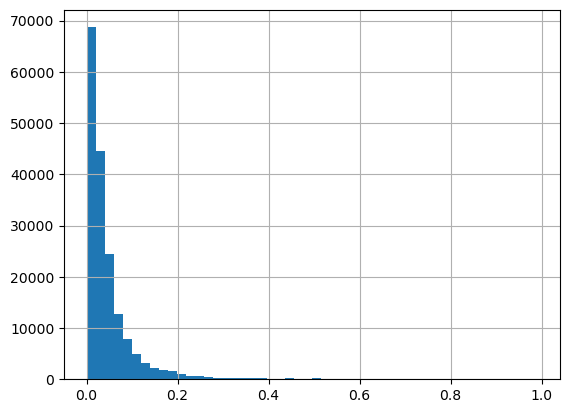

In [33]:
test.fire_probability.hist(bins=50)

In [36]:
test[(test.total_dwelling_units == 2) &
     (test.building_type_code_wu == 1) &
     (test.construction_year == 1969) &
     (test.dofa_actual_year == 1969) &
     (test.total_occupied == 0) &
     (test.encoded_zip5 == 561)]

,total_dwelling_units,acc_units,total_occupied,regular_vacant,total_units,pct_occupied,number_reported,pct_reported,months_since_report,pct_movein,people_per_unit,people_total,rent_per_month,spending_per_month,spending_per_month_prev_yr,hh_income,person_income,pct_lt5k,pct_5k_lt10k,pct_10k_lt15k,pct_15k_lt20k,pct_ge20k,pct_wage_major,pct_welfare_major,pct_other_major,pct_median,pct_lt50_median,pct_lt30_median,pct_2adults,pct_1adult,pct_female_head,pct_female_head_child,pct_disabled_lt62,pct_disabled_ge62,pct_disabled_all,pct_lt24_head,pct_age25_50,pct_age51_61,pct_age62plus,pct_age85plus,pct_minority,pct_black,pct_native_american,pct_asian,pct_hispanic,months_waiting,months_from_movein,pct_utility_allow,ave_util_allow,pct_bed1,pct_bed2,pct_bed3,pct_overhoused,tminority,tpoverty,tpct_ownsfd,chldrn_mbr_cnt,eldly_prcnt,pct_disabled_lt62_all,pct_lt80_median,median_inc_amnt,metro,micro,c1pprb,annl_expns_amnt,annl_expns_amnt_prev_yr,pha_total_units,dev_spending_per_month_prev_yr,dev_chldrn_mbr_cnt,dev_annl_expns_amnt,dev_annl_expns_amnt_prev_yr,dev_eldly_prcnt,dev_pct_disabled_lt62_all,dev_pct_lt80_median,dev_median_inc_amnt,dev_total_units,dev_total_dwelling_units,dev_acc_units,dev_total_occupied,dev_regular_vacant,dev_pha_total_units,dev_pct_occupied,dev_number_reported,dev_pct_reported,dev_months_since_report,dev_pct_movein,dev_people_per_unit,dev_people_total,dev_rent_per_month,dev_spending_per_month,dev_hh_income,dev_person_income,dev_pct_lt5k,dev_pct_5k_lt10k,dev_pct_10k_lt15k,dev_pct_15k_lt20k,dev_pct_ge20k,dev_pct_wage_major,dev_pct_welfare_major,dev_pct_other_major,dev_pct_median,dev_pct_lt50_median,dev_pct_lt30_median,dev_pct_2adults,dev_pct_1adult,dev_pct_female_head,dev_pct_female_head_child,dev_pct_disabled_lt62,dev_pct_disabled_ge62,dev_pct_disabled_all,dev_pct_lt24_head,dev_pct_age25_50,dev_pct_age51_61,dev_pct_age62plus,dev_pct_age85plus,dev_pct_minority,dev_pct_black,dev_pct_native_american,dev_pct_asian,dev_pct_hispanic,dev_months_waiting,dev_months_from_movein,dev_pct_utility_allow,dev_ave_util_allow,dev_pct_bed1,dev_pct_bed2,dev_pct_bed3,dev_pct_overhoused,dev_tminority,dev_tpoverty,dev_tpct_ownsfd,pha_section8_units_cnt,pha_section8_occupied,pha_opfund_amnt,pha_opfund_amnt_prev_yr,pha_capfund_amnt,pha_capfund_amnt_prev_yr,pha_ross_amnt,pha_fss_amnt,pha_chldrn_mbr_cnt,pha_eldly_prcnt,pha_pct_disabled_lt62_all,pha_pct_lt80_median,pha_median_inc_amnt,pha_annl_expns_amnt,pha_annl_expns_amnt_prev_yr,construction_year,dofa_actual_year,encoded_development_code,encoded_participant_code,encoded_msa_nm,encoded_zip5,encoded_zip9,encoded_zip11,msgusps_100% overall probable correctness,msgusps_20% overall probable correctness,msgusps_30% overall probable correctness,msgusps_40% overall probable correctness,msgusps_50% overall probable correctness,msgusps_60% overall probable correctness,msgusps_70% overall probable correctness,msgusps_80% overall probable correctness,msgusps_90% overall probable correctness,msgusps_apartment missing or not found,msgusps_house # not found on this street,msgusps_insufficient or blank address,msgusps_multiple match,msgusps_street not found,"pha_ha_section_8_size_category_extra large (5,000+)","pha_ha_section_8_size_category_large (1,000-4,999)",pha_ha_section_8_size_category_medium high (300-999),pha_ha_section_8_size_category_medium low (100-299),pha_ha_section_8_size_category_small (50-99),pha_ha_section_8_size_category_very small (0-49),building_type_code_es,building_type_code_nds,building_type_code_rw,building_type_code_sd,building_type_code_sf,building_type_code_wu,addr_type_f,addr_type_g,addr_type_h,addr_type_missing_value,addr_type_p,addr_type_r,addr_type_s,building_status_type_code_ddaprd,building_status_type_code_dddrft,building_status_type_code_ddprop,building_status_type_code_inapcp,building_status_type_code_rmi,building_status_type_code_rmiprp,"pha_ha_combined_size_category_extra large (5,000+)","pha_ha_combined_size_category_large (1,000-4,999)",pha_ha_combined_size_category_medium

In [30]:
cleaned [(cleaned.total_dwelling_units == 2) &
     (cleaned.building_type_code_wu == 1) &
     (cleaned.construction_year == 1969) &
     (cleaned.dofa_actual_year == 1969) &
     (cleaned.total_occupied == 0) ]

,corrected_address,corrected_unit,std_city,std_st,std_zip5,total_dwelling_units,acc_units,total_occupied,regular_vacant,total_units,pct_occupied,number_reported,pct_reported,months_since_report,pct_movein,people_per_unit,people_total,rent_per_month,spending_per_month,spending_per_month_prev_yr,hh_income,person_income,pct_lt5k,pct_5k_lt10k,pct_10k_lt15k,pct_15k_lt20k,pct_ge20k,pct_wage_major,pct_welfare_major,pct_other_major,pct_median,pct_lt50_median,pct_lt30_median,pct_2adults,pct_1adult,pct_female_head,pct_female_head_child,pct_disabled_lt62,pct_disabled_ge62,pct_disabled_all,pct_lt24_head,pct_age25_50,pct_age51_61,pct_age62plus,pct_age85plus,pct_minority,pct_black,pct_native_american,pct_asian,pct_hispanic,months_waiting,months_from_movein,pct_utility_allow,ave_util_allow,pct_bed1,pct_bed2,pct_bed3,pct_overhoused,tminority,tpoverty,tpct_ownsfd,chldrn_mbr_cnt,eldly_prcnt,pct_disabled_lt62_all,pct_lt80_median,median_inc_amnt,metro,micro,c1pprb,annl_expns_amnt,annl_expns_amnt_prev_yr,pha_total_units,dev_spending_per_month_prev_yr,dev_chldrn_mbr_cnt,dev_annl_expns_amnt,dev_annl_expns_amnt_prev_yr,dev_eldly_prcnt,dev_pct_disabled_lt62_all,dev_pct_lt80_median,dev_median_inc_amnt,dev_total_units,dev_total_dwelling_units,dev_acc_units,dev_total_occupied,dev_regular_vacant,dev_pha_total_units,dev_pct_occupied,dev_number_reported,dev_pct_reported,dev_months_since_report,dev_pct_movein,dev_people_per_unit,dev_people_total,dev_rent_per_month,dev_spending_per_month,dev_hh_income,dev_person_income,dev_pct_lt5k,dev_pct_5k_lt10k,dev_pct_10k_lt15k,dev_pct_15k_lt20k,dev_pct_ge20k,dev_pct_wage_major,dev_pct_welfare_major,dev_pct_other_major,dev_pct_median,dev_pct_lt50_median,dev_pct_lt30_median,dev_pct_2adults,dev_pct_1adult,dev_pct_female_head,dev_pct_female_head_child,dev_pct_disabled_lt62,dev_pct_disabled_ge62,dev_pct_disabled_all,dev_pct_lt24_head,dev_pct_age25_50,dev_pct_age51_61,dev_pct_age62plus,dev_pct_age85plus,dev_pct_minority,dev_pct_black,dev_pct_native_american,dev_pct_asian,dev_pct_hispanic,dev_months_waiting,dev_months_from_movein,dev_pct_utility_allow,dev_ave_util_allow,dev_pct_bed1,dev_pct_bed2,dev_pct_bed3,dev_pct_overhoused,dev_tminority,dev_tpoverty,dev_tpct_ownsfd,pha_section8_units_cnt,pha_section8_occupied,pha_opfund_amnt,pha_opfund_amnt_prev_yr,pha_capfund_amnt,pha_capfund_amnt_prev_yr,pha_ross_amnt,pha_fss_amnt,pha_chldrn_mbr_cnt,pha_eldly_prcnt,pha_pct_disabled_lt62_all,pha_pct_lt80_median,pha_median_inc_amnt,pha_annl_expns_amnt,pha_annl_expns_amnt_prev_yr,construction_year,dofa_actual_year,encoded_development_code,encoded_participant_code,encoded_msa_nm,encoded_zip5,encoded_zip9,encoded_zip11,msgusps_100% overall probable correctness,msgusps_20% overall probable correctness,msgusps_30% overall probable correctness,msgusps_40% overall probable correctness,msgusps_50% overall probable correctness,msgusps_60% overall probable correctness,msgusps_70% overall probable correctness,msgusps_80% overall probable correctness,msgusps_90% overall probable correctness,msgusps_apartment missing or not found,msgusps_house # not found on this street,msgusps_insufficient or blank address,msgusps_multiple match,msgusps_street not found,"pha_ha_section_8_size_category_extra large (5,000+)","pha_ha_section_8_size_category_large (1,000-4,999)",pha_ha_section_8_size_category_medium high (300-999),pha_ha_section_8_size_category_medium low (100-299),pha_ha_section_8_size_category_small (50-99),pha_ha_section_8_size_category_very small (0-49),building_type_code_es,building_type_code_nds,building_type_code_rw,building_type_code_sd,building_type_code_sf,building_type_code_wu,addr_type_f,addr_type_g,addr_type_h,addr_type_missing_value,addr_type_p,addr_type_r,addr_type_s,building_status_type_code_ddaprd,building_status_type_code_dddrft,building_status_type_code_ddprop,building_status_type_code_inapcp,building_status_type_code_rmi,building_status_type_code_rmiprp,"pha_ha_combined_size_category_extra large (5,000+)","pha_ha_combined_size_category

In [23]:
test[

    (test.total_dwelling_units == 2) &
     (test.building_type_code_wu == 1) &
     (test.construction_year == 1969) &
     (test.dofa_actual_year == 1969) &
     (test.total_occupied == 0) 
     ]

,total_dwelling_units,acc_units,total_occupied,regular_vacant,total_units,pct_occupied,number_reported,pct_reported,months_since_report,pct_movein,people_per_unit,people_total,rent_per_month,spending_per_month,spending_per_month_prev_yr,hh_income,person_income,pct_lt5k,pct_5k_lt10k,pct_10k_lt15k,pct_15k_lt20k,pct_ge20k,pct_wage_major,pct_welfare_major,pct_other_major,pct_median,pct_lt50_median,pct_lt30_median,pct_2adults,pct_1adult,pct_female_head,pct_female_head_child,pct_disabled_lt62,pct_disabled_ge62,pct_disabled_all,pct_lt24_head,pct_age25_50,pct_age51_61,pct_age62plus,pct_age85plus,pct_minority,pct_black,pct_native_american,pct_asian,pct_hispanic,months_waiting,months_from_movein,pct_utility_allow,ave_util_allow,pct_bed1,pct_bed2,pct_bed3,pct_overhoused,tminority,tpoverty,tpct_ownsfd,chldrn_mbr_cnt,eldly_prcnt,pct_disabled_lt62_all,pct_lt80_median,median_inc_amnt,metro,micro,c1pprb,annl_expns_amnt,annl_expns_amnt_prev_yr,pha_total_units,dev_spending_per_month_prev_yr,dev_chldrn_mbr_cnt,dev_annl_expns_amnt,dev_annl_expns_amnt_prev_yr,dev_eldly_prcnt,dev_pct_disabled_lt62_all,dev_pct_lt80_median,dev_median_inc_amnt,dev_total_units,dev_total_dwelling_units,dev_acc_units,dev_total_occupied,dev_regular_vacant,dev_pha_total_units,dev_pct_occupied,dev_number_reported,dev_pct_reported,dev_months_since_report,dev_pct_movein,dev_people_per_unit,dev_people_total,dev_rent_per_month,dev_spending_per_month,dev_hh_income,dev_person_income,dev_pct_lt5k,dev_pct_5k_lt10k,dev_pct_10k_lt15k,dev_pct_15k_lt20k,dev_pct_ge20k,dev_pct_wage_major,dev_pct_welfare_major,dev_pct_other_major,dev_pct_median,dev_pct_lt50_median,dev_pct_lt30_median,dev_pct_2adults,dev_pct_1adult,dev_pct_female_head,dev_pct_female_head_child,dev_pct_disabled_lt62,dev_pct_disabled_ge62,dev_pct_disabled_all,dev_pct_lt24_head,dev_pct_age25_50,dev_pct_age51_61,dev_pct_age62plus,dev_pct_age85plus,dev_pct_minority,dev_pct_black,dev_pct_native_american,dev_pct_asian,dev_pct_hispanic,dev_months_waiting,dev_months_from_movein,dev_pct_utility_allow,dev_ave_util_allow,dev_pct_bed1,dev_pct_bed2,dev_pct_bed3,dev_pct_overhoused,dev_tminority,dev_tpoverty,dev_tpct_ownsfd,pha_section8_units_cnt,pha_section8_occupied,pha_opfund_amnt,pha_opfund_amnt_prev_yr,pha_capfund_amnt,pha_capfund_amnt_prev_yr,pha_ross_amnt,pha_fss_amnt,pha_chldrn_mbr_cnt,pha_eldly_prcnt,pha_pct_disabled_lt62_all,pha_pct_lt80_median,pha_median_inc_amnt,pha_annl_expns_amnt,pha_annl_expns_amnt_prev_yr,construction_year,dofa_actual_year,encoded_development_code,encoded_participant_code,encoded_msa_nm,encoded_zip5,encoded_zip9,encoded_zip11,msgusps_100% overall probable correctness,msgusps_20% overall probable correctness,msgusps_30% overall probable correctness,msgusps_40% overall probable correctness,msgusps_50% overall probable correctness,msgusps_60% overall probable correctness,msgusps_70% overall probable correctness,msgusps_80% overall probable correctness,msgusps_90% overall probable correctness,msgusps_apartment missing or not found,msgusps_house # not found on this street,msgusps_insufficient or blank address,msgusps_multiple match,msgusps_street not found,"pha_ha_section_8_size_category_extra large (5,000+)","pha_ha_section_8_size_category_large (1,000-4,999)",pha_ha_section_8_size_category_medium high (300-999),pha_ha_section_8_size_category_medium low (100-299),pha_ha_section_8_size_category_small (50-99),pha_ha_section_8_size_category_very small (0-49),building_type_code_es,building_type_code_nds,building_type_code_rw,building_type_code_sd,building_type_code_sf,building_type_code_wu,addr_type_f,addr_type_g,addr_type_h,addr_type_missing_value,addr_type_p,addr_type_r,addr_type_s,building_status_type_code_ddaprd,building_status_type_code_dddrft,building_status_type_code_ddprop,building_status_type_code_inapcp,building_status_type_code_rmi,building_status_type_code_rmiprp,"pha_ha_combined_size_category_extra large (5,000+)","pha_ha_combined_size_category_large (1,000-4,999)",pha_ha_combined_size_category_medium

In [16]:
public = public[public.STD_ADDR.notna()]
public[(public.STD_ADDR.str.contains('869 N 23rd St'))]

,X,Y,OBJECTID,PARTICIPANT_CODE,FORMAL_PARTICIPANT_NAME,DEVELOPMENT_CODE,PROJECT_NAME,BUILDING_NAME,BUILDING_NUMBER,BUILDING_TYPE_CODE,BUILDING_STATUS_TYPE_CODE,NATIONAL_BLDG_ID,CONSTRUCT_DATE,DOFA_ACTUAL_DT,TOTAL_DWELLING_UNITS,ACC_UNITS,TOTAL_OCCUPIED,REGULAR_VACANT,TOTAL_UNITS,PCT_OCCUPIED,NUMBER_REPORTED,PCT_REPORTED,MONTHS_SINCE_REPORT,PCT_MOVEIN,PEOPLE_PER_UNIT,PEOPLE_TOTAL,RENT_PER_MONTH,SPENDING_PER_MONTH,SPENDING_PER_MONTH_PREV_YR,HH_INCOME,PERSON_INCOME,PCT_LT5K,PCT_5K_LT10K,PCT_10K_LT15K,PCT_15K_LT20K,PCT_GE20K,PCT_WAGE_MAJOR,PCT_WELFARE_MAJOR,PCT_OTHER_MAJOR,PCT_MEDIAN,PCT_LT50_MEDIAN,PCT_LT30_MEDIAN,PCT_2ADULTS,PCT_1ADULT,PCT_FEMALE_HEAD,PCT_FEMALE_HEAD_CHILD,PCT_DISABLED_LT62,PCT_DISABLED_GE62,PCT_DISABLED_ALL,PCT_LT24_HEAD,PCT_AGE25_50,PCT_AGE51_61,PCT_AGE62PLUS,PCT_AGE85PLUS,PCT_MINORITY,PCT_BLACK,PCT_NATIVE_AMERICAN,PCT_ASIAN,PCT_HISPANIC,MONTHS_WAITING,MONTHS_FROM_MOVEIN,PCT_UTILITY_ALLOW,AVE_UTIL_ALLOW,PCT_BED1,PCT_BED2,PCT_BED3,PCT_OVERHOUSED,TMINORITY,TPOVERTY,TPCT_OWNSFD,CHLDRN_MBR_CNT,ELDLY_PRCNT,PCT_DISABLED_LT62_ALL,PCT_LT80_MEDIAN,MEDIAN_INC_AMNT,STATE2KX,CNTY_NM2KX,CNTY2KX,TRACT2KX,BG2KX,BLOCK2KX,DPVACT,DPVNOST,CURCNTY_NM,CURCNTY,CURCOSUB,CURCOSUB_NM,PLACE2KX,PLACE_NM2KX,PLACE_CC2KX,PLACE_INC2KX,MSA,MSA_NM,CBSA,CBSA_NM,NECTA,NECTA_NM,METRO,MICRO,FCD_FIPS91,HLC,DPV,DPVRC,STD_ADDR,URB_OUT,STD_CITY,STD_ST,STD_ZIP5,STD_ZIP9,ZIP_CLASS,ZCTA2KX,DPBC,DPBC_CKSUM,STD_ZIP11,ADDR_TYPE,APT_NO,APT_TYPE,C1PGRC,C1PPRB,C1PDRC,C1PSRC,C1PARC,C1PZRC,MSGUSPS,LAT,LON,RC2KX,STM2KX,LVL2KX,UR,MSG2KX,COUNTY_LEVEL,PLACE_LEVEL,TRACT_LEVEL,BLKGRP_LEVEL,RAD_CHAP_INDR,RAD_TYPE,LAST_UPDT_DTTM,ANNL_EXPNS_AMNT,ANNL_EXPNS_AMNT_PREV_YR,PHA_TOTAL_UNITS,DEV_BUIL_NU_ENTRANCE,HA_PHN_NUM,HA_FAX_NUM,HA_EMAIL_ADDR_TEXT,EXEC_DIR_PHONE,EXEC_DIR_FAX,EXEC_DIR_EMAIL
171315,-75.174267,39.971459,171316,PA002,Philadelphia Housing Authority,PA002000906,SCATTERED SITES,Francisville Office,4239,WU,INAPCP,6.566910e+09,1969/06/01 00:00:00+00,1969/06/01 00:00:00+00,2,2,0,2,2,0.0,0,-4.0,-4,-4.0,-4.0,-4,-4,-4,-4,-4,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4,-4.0,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4.0,-4.0,-4.0,-4,42.0,Philadelphia,101.0,13500.0,1.0,1002.0,NaN,NaN,Philadelphia,101.0,60000.0,Philadelphia,60000.0,Philadelphia city,C5,NaN,6160.0,"Philadelphia, PA-NJ PMSA",37980.0,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Me...",99999.0,NaN,1.0,0.0,4203,5451.0,NaN,NaN,869 N 23rd St,NaN,Philadelphia,PA,19130.0,1950.0,NaN,19130.0,69.0,6.0,1.913020e+10,S,NaN,NaN,NaN,1.0,NaN,NaN,A,NaN,90% Overall probable correctness,39.971459,-75.174267,S,NaN,R,U,** Street-Level Rooftop **,42101.0,4260000.0,4.210101e+10,4.210101e+11,N,,2023/03/06 08:50:52+00,-4,-4.0,12799,PA00200090642391,2156844174,2.156844e+09,info@pha.phila.gov,2.156844e+09,NaN,Kelvin.Jeremiah@pha.phila.gov


In [6]:
test.sample()

,total_dwelling_units,acc_units,total_occupied,regular_vacant,total_units,pct_occupied,number_reported,pct_reported,months_since_report,pct_movein,people_per_unit,people_total,rent_per_month,spending_per_month,spending_per_month_prev_yr,hh_income,person_income,pct_lt5k,pct_5k_lt10k,pct_10k_lt15k,pct_15k_lt20k,pct_ge20k,pct_wage_major,pct_welfare_major,pct_other_major,pct_median,pct_lt50_median,pct_lt30_median,pct_2adults,pct_1adult,pct_female_head,pct_female_head_child,pct_disabled_lt62,pct_disabled_ge62,pct_disabled_all,pct_lt24_head,pct_age25_50,pct_age51_61,pct_age62plus,pct_age85plus,pct_minority,pct_black,pct_native_american,pct_asian,pct_hispanic,months_waiting,months_from_movein,pct_utility_allow,ave_util_allow,pct_bed1,pct_bed2,pct_bed3,pct_overhoused,tminority,tpoverty,tpct_ownsfd,chldrn_mbr_cnt,eldly_prcnt,pct_disabled_lt62_all,pct_lt80_median,median_inc_amnt,metro,micro,c1pprb,annl_expns_amnt,annl_expns_amnt_prev_yr,pha_total_units,dev_spending_per_month_prev_yr,dev_chldrn_mbr_cnt,dev_annl_expns_amnt,dev_annl_expns_amnt_prev_yr,dev_eldly_prcnt,dev_pct_disabled_lt62_all,dev_pct_lt80_median,dev_median_inc_amnt,dev_total_units,dev_total_dwelling_units,dev_acc_units,dev_total_occupied,dev_regular_vacant,dev_pha_total_units,dev_pct_occupied,dev_number_reported,dev_pct_reported,dev_months_since_report,dev_pct_movein,dev_people_per_unit,dev_people_total,dev_rent_per_month,dev_spending_per_month,dev_hh_income,dev_person_income,dev_pct_lt5k,dev_pct_5k_lt10k,dev_pct_10k_lt15k,dev_pct_15k_lt20k,dev_pct_ge20k,dev_pct_wage_major,dev_pct_welfare_major,dev_pct_other_major,dev_pct_median,dev_pct_lt50_median,dev_pct_lt30_median,dev_pct_2adults,dev_pct_1adult,dev_pct_female_head,dev_pct_female_head_child,dev_pct_disabled_lt62,dev_pct_disabled_ge62,dev_pct_disabled_all,dev_pct_lt24_head,dev_pct_age25_50,dev_pct_age51_61,dev_pct_age62plus,dev_pct_age85plus,dev_pct_minority,dev_pct_black,dev_pct_native_american,dev_pct_asian,dev_pct_hispanic,dev_months_waiting,dev_months_from_movein,dev_pct_utility_allow,dev_ave_util_allow,dev_pct_bed1,dev_pct_bed2,dev_pct_bed3,dev_pct_overhoused,dev_tminority,dev_tpoverty,dev_tpct_ownsfd,pha_section8_units_cnt,pha_section8_occupied,pha_opfund_amnt,pha_opfund_amnt_prev_yr,pha_capfund_amnt,pha_capfund_amnt_prev_yr,pha_ross_amnt,pha_fss_amnt,pha_chldrn_mbr_cnt,pha_eldly_prcnt,pha_pct_disabled_lt62_all,pha_pct_lt80_median,pha_median_inc_amnt,pha_annl_expns_amnt,pha_annl_expns_amnt_prev_yr,construction_year,dofa_actual_year,encoded_development_code,encoded_participant_code,encoded_msa_nm,encoded_zip5,encoded_zip9,encoded_zip11,msgusps_100% overall probable correctness,msgusps_20% overall probable correctness,msgusps_30% overall probable correctness,msgusps_40% overall probable correctness,msgusps_50% overall probable correctness,msgusps_60% overall probable correctness,msgusps_70% overall probable correctness,msgusps_80% overall probable correctness,msgusps_90% overall probable correctness,msgusps_apartment missing or not found,msgusps_house # not found on this street,msgusps_insufficient or blank address,msgusps_multiple match,msgusps_street not found,"pha_ha_section_8_size_category_extra large (5,000+)","pha_ha_section_8_size_category_large (1,000-4,999)",pha_ha_section_8_size_category_medium high (300-999),pha_ha_section_8_size_category_medium low (100-299),pha_ha_section_8_size_category_small (50-99),pha_ha_section_8_size_category_very small (0-49),building_type_code_es,building_type_code_nds,building_type_code_rw,building_type_code_sd,building_type_code_sf,building_type_code_wu,addr_type_f,addr_type_g,addr_type_h,addr_type_missing_value,addr_type_p,addr_type_r,addr_type_s,building_status_type_code_ddaprd,building_status_type_code_dddrft,building_status_type_code_ddprop,building_status_type_code_inapcp,building_status_type_code_rmi,building_status_type_code_rmiprp,"pha_ha_combined_size_category_extra large (5,000+)","pha_ha_combined_size_category_large (1,000-4,999)",pha_ha_combined_size_category_medium

In [98]:
p = pd.read_csv('./data/Public_Housing_Buildings.csv')
p.sample()

C:\Users\jackv\AppData\Local\Temp\ipykernel_3172\405853121.py:1: DtypeWarning: Columns (104) have mixed types. Specify dtype option on import or set low_memory=False.
  p = pd.read_csv('./data/Public_Housing_Buildings.csv')


,X,Y,OBJECTID,PARTICIPANT_CODE,FORMAL_PARTICIPANT_NAME,DEVELOPMENT_CODE,PROJECT_NAME,BUILDING_NAME,BUILDING_NUMBER,BUILDING_TYPE_CODE,BUILDING_STATUS_TYPE_CODE,NATIONAL_BLDG_ID,CONSTRUCT_DATE,DOFA_ACTUAL_DT,TOTAL_DWELLING_UNITS,ACC_UNITS,TOTAL_OCCUPIED,REGULAR_VACANT,TOTAL_UNITS,PCT_OCCUPIED,NUMBER_REPORTED,PCT_REPORTED,MONTHS_SINCE_REPORT,PCT_MOVEIN,PEOPLE_PER_UNIT,PEOPLE_TOTAL,RENT_PER_MONTH,SPENDING_PER_MONTH,SPENDING_PER_MONTH_PREV_YR,HH_INCOME,PERSON_INCOME,PCT_LT5K,PCT_5K_LT10K,PCT_10K_LT15K,PCT_15K_LT20K,PCT_GE20K,PCT_WAGE_MAJOR,PCT_WELFARE_MAJOR,PCT_OTHER_MAJOR,PCT_MEDIAN,PCT_LT50_MEDIAN,PCT_LT30_MEDIAN,PCT_2ADULTS,PCT_1ADULT,PCT_FEMALE_HEAD,PCT_FEMALE_HEAD_CHILD,PCT_DISABLED_LT62,PCT_DISABLED_GE62,PCT_DISABLED_ALL,PCT_LT24_HEAD,PCT_AGE25_50,PCT_AGE51_61,PCT_AGE62PLUS,PCT_AGE85PLUS,PCT_MINORITY,PCT_BLACK,PCT_NATIVE_AMERICAN,PCT_ASIAN,PCT_HISPANIC,MONTHS_WAITING,MONTHS_FROM_MOVEIN,PCT_UTILITY_ALLOW,AVE_UTIL_ALLOW,PCT_BED1,PCT_BED2,PCT_BED3,PCT_OVERHOUSED,TMINORITY,TPOVERTY,TPCT_OWNSFD,CHLDRN_MBR_CNT,ELDLY_PRCNT,PCT_DISABLED_LT62_ALL,PCT_LT80_MEDIAN,MEDIAN_INC_AMNT,STATE2KX,CNTY_NM2KX,CNTY2KX,TRACT2KX,BG2KX,BLOCK2KX,DPVACT,DPVNOST,CURCNTY_NM,CURCNTY,CURCOSUB,CURCOSUB_NM,PLACE2KX,PLACE_NM2KX,PLACE_CC2KX,PLACE_INC2KX,MSA,MSA_NM,CBSA,CBSA_NM,NECTA,NECTA_NM,METRO,MICRO,FCD_FIPS91,HLC,DPV,DPVRC,STD_ADDR,URB_OUT,STD_CITY,STD_ST,STD_ZIP5,STD_ZIP9,ZIP_CLASS,ZCTA2KX,DPBC,DPBC_CKSUM,STD_ZIP11,ADDR_TYPE,APT_NO,APT_TYPE,C1PGRC,C1PPRB,C1PDRC,C1PSRC,C1PARC,C1PZRC,MSGUSPS,LAT,LON,RC2KX,STM2KX,LVL2KX,UR,MSG2KX,COUNTY_LEVEL,PLACE_LEVEL,TRACT_LEVEL,BLKGRP_LEVEL,RAD_CHAP_INDR,RAD_TYPE,LAST_UPDT_DTTM,ANNL_EXPNS_AMNT,ANNL_EXPNS_AMNT_PREV_YR,PHA_TOTAL_UNITS,DEV_BUIL_NU_ENTRANCE,HA_PHN_NUM,HA_FAX_NUM,HA_EMAIL_ADDR_TEXT,EXEC_DIR_PHONE,EXEC_DIR_FAX,EXEC_DIR_EMAIL
149716,-81.251657,29.467223,149717,FL030,Housing Authority of the County of Flagler,FL030000030,JOHN MCINTOSH,JOHN MCINTOSH,B_0002,SD,INAPCP,1.542500e+09,1970/06/15 00:00:00+00,1970/09/30 00:00:00+00,2,2,2,0,2,100.0,2,-4.0,-4,-4.0,-4.0,-4,-4,-4,-4,-4,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4,-4.0,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4.0,-4.0,-4.0,-4,12.0,Flagler,35.0,60207.0,3.0,3003.0,NaN,NaN,Flagler,35.0,90338.0,Bunnell,9550.0,Bunnell city,C1,NaN,2020.0,"Daytona Beach, FL MSA",19660.0,"Deltona-Daytona Beach-Ormond Beach, FL Metropo...",99999.0,NaN,1.0,0.0,1206,360.0,NaN,NaN,404 S Bacher St,NaN,Bunnell,FL,32110.0,59.0,NaN,32110.0,4.0,5.0,3.211001e+10,S,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,70% Overall probable correctness,29.467223,-81.251657,S,NaN,R,U,** Street-Level Rooftop **,12035.0,1209550.0,1.203506e+10,1.203506e+11,N,,2023/03/06 08:50:52+00,-4,-4.0,131,FL030000030B_0002001,3864373221,3.864372e+09,rbeyrer@flaglerhousing.org,3.864373e+09,3.864372e+09,rbeyrer@flaglerhousing.org


In [99]:
nspire = pd.read_csv('./data/nspire_demo_deficiencies.csv')

C:\Users\jackv\AppData\Local\Temp\ipykernel_3172\2313707145.py:1: DtypeWarning: Columns (12,38) have mixed types. Specify dtype option on import or set low_memory=False.
  nspire = pd.read_csv('./data/nspire_demo_deficiencies.csv')


In [146]:
nspire['Deficiency Location Address'] = nspire['Deficiency Location Address'].fillna('')
nspire['add_size'] = nspire['Deficiency Location Address'].apply(len)

              precision    recall  f1-score   support

       False       1.00      0.98      0.99    178342
        True       0.08      0.45      0.13       701

    accuracy                           0.98    179043
   macro avg       0.54      0.71      0.56    179043
weighted avg       0.99      0.98      0.99    179043



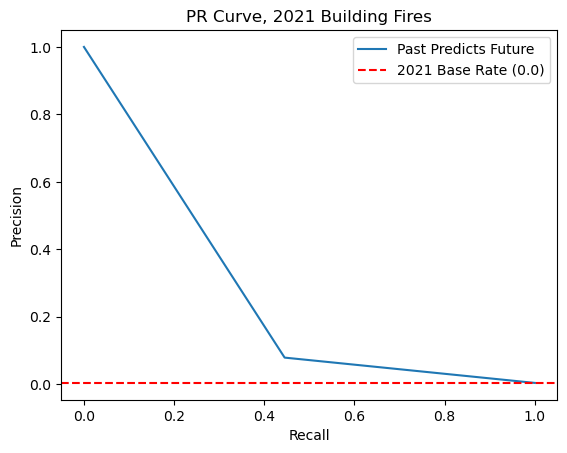

In [85]:
df = pd.read_csv('./ph_fires_matched_1.1.csv')

# df = df[
#     (df.building_type_code_es == 1) |
#     (df.addr_type_h == 1)
# ]

df['total_fires_pre_2021'] = df[[x for x in df.columns if '2021' not in x and 'building_fires_' in x]].sum(axis=1)
df['simple_prediction'] = df.total_fires_pre_2021 > 0
df['simple_test'] = df.building_fires_2021 > 0

# df['total_loss_pre_2021'] = df[[x for x in df.columns if '2021' not in x and ('prop_loss_' in x or 'cont_loss_' in x)]].sum(axis=1)
# print(df.total_loss_pre_2021.sum())
# df['simple_prediction'] = df.total_loss_pre_2021 > 0
# df['simple_test'] = (df.cont_loss_2021 > 0) | (df.prop_loss_2021 > 0)

from sklearn.metrics import classification_report

report = classification_report(df.simple_test, df.simple_prediction)
print(report)

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(df.simple_test, df.simple_prediction)

plt.plot(recall, precision, label="Past Predicts Future")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve, 2021 Building Fires")
base_rate = len(df[df.building_fires_2021 > 0]) / len(df)
plt.axhline(base_rate, color='r', linestyle='--', label=f'2021 Base Rate ({round(base_rate, 2)})')
plt.legend()
plt.show()


In [78]:
df = pd.read_csv('./full_fema_matches.csv')
keys = df.INCIDENT_KEY.unique()

conn = sqlite3.Connection('./data/nfirs/fire_data.db')

placeholders = ', '.join(['?'] * len(keys))
query = f"SELECT * FROM incident_address ia left join basic_incident bi using (INCIDENT_KEY) left join fire_incident fi using (INCIDENT_KEY) WHERE ia.INCIDENT_KEY IN ({placeholders})"
df = pd.read_sql_query(query, conn, params=keys.tolist())

In [79]:
print(df.shape)
df.sample(3)

(10956, 141)


,INCIDENT_KEY,STATE,FDID,INC_DATE,INC_NO,EXP_NO,LOC_TYPE,NUM_MILE,STREET_PRE,STREETNAME,STREETTYPE,STREETSUF,APT_NO,CITY,STATE_ID,ZIP5,ZIP4,X_STREET,address,INC_YEAR,STATE,FDID,INC_DATE,INC_NO,EXP_NO,VERSION,DEPT_STA,INC_TYPE,ADD_WILD,AID,ALARM,ARRIVAL,INC_CONT,LU_CLEAR,SHIFT,ALARMS,DISTRICT,ACT_TAK1,ACT_TAK2,ACT_TAK3,APP_MOD,SUP_APP,EMS_APP,OTH_APP,SUP_PER,EMS_PER,OTH_PER,RESOU_AID,PROP_LOSS,CONT_LOSS,PROP_VAL,CONT_VAL,FF_DEATH,OTH_DEATH,FF_INJ,OTH_INJ,DET_ALERT,HAZ_REL,MIXED_USE,PROP_USE,CENSUS,STATE,FDID,INC_DATE,INC_NO,EXP_NO,VERSION,NUM_UNIT,NOT_RES,BLDG_INVOL,ACRES_BURN,LESS_1ACRE,ON_SITE_M1,MAT_STOR1,ON_SITE_M2,MAT_STOR2,ON_SITE_M3,MAT_STOR3,AREA_ORIG,HEAT_SOURC,FIRST_IGN,CONF_ORIG,TYPE_MAT,CAUSE_IGN,FACT_IGN_1,FACT_IGN_2,HUM_FAC_1,HUM_FAC_2,HUM_FAC_3,HUM_FAC_4,HUM_FAC_5,HUM_FAC_6,HUM_FAC_7,HUM_FAC_8,AGE,SEX,EQUIP_INV,SUP_FAC_1,SUP_FAC_2,SUP_FAC_3,MOB_INVOL,MOB_TYPE,MOB_MAKE,MOB_MODEL,MOB_YEAR,MOB_LIC_PL,MOB_STATE,MOB_VIN_NO,EQ_BRAND,EQ_MODEL,EQ_SER_NO,EQ_YEAR,EQ_POWER,EQ_PORT,FIRE_SPRD,STRUC_TYPE,STRUC_STAT,BLDG_ABOVE,BLDG_BELOW,BLDG_LGTH,BLDG_WIDTH,TOT_SQ_FT,FIRE_ORIG,ST_DAM_MIN,ST_DAM_SIG,ST_DAM_HVY,ST_DAM_XTR,FLAME_SPRD,ITEM_SPRD,MAT_SPRD,DETECTOR,DET_TYPE,DET_POWER,DET_OPERAT,DET_EFFECT,DET_FAIL,AES_PRES,AES_TYPE,AES_OPER,NO_SPR_OP,AES_FAIL
3440,MA_23044_04222021_7138_0,MA,23044,4222021,7138,0,1,1380,None,MAIN,ST,None,None,BROCKTON,MA,2301,NaN,None,1380 MAIN ST,2021,MA,23044,4222021,7138,0,5.0,None,113,N,N,42220211228,42220211233,None,4.222021e+10,1,0,213,87.0,None,None,Y,3.0,0.0,1.0,10.0,0.0,2.0,N,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,U,N,NN,429,511600,MA,23044,4222021.0,7138,0.0,5.0,200.0,N,0.0,0.0,N,NNN,N,None,None,None,None,24,12,76,1.0,None,2,NN,NaN,None,NaN,3.0,NaN,NaN,NaN,NaN,None,NaN,NaN,646,None,NaN,NaN,N,None,None,None,NaN,None,None,None,None,None,None,NaN,11,2.0,1.0,1.0,2,10.0,1.0,200.0,75.0,NaN,5.0,NaN,NaN,NaN,NaN,N,None,None,1,1,4,2,1,None,1,1,3,NaN,None
6697,NJ_11070_3212015_1501868_0,NJ,11070,3212015,1501868,0,1,630,W,STATE,ST,None,None,TRENTON,NJ,8618,NaN,COLONIAL AVE,630 W STATE ST,2015,NJ,11070,3212015,1501868,0,5.0,S8,113,N,N,32120150440,32120150445,32120150445.0,3.212015e+10,None,1,None,86.0,51,63,Y,3.0,1.0,0.0,12.0,4.0,0.0,N,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,1,N,NN,429,None,None,None,NaN,None,NaN,NaN,NaN,None,None,NaN,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,None,None,None,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None
8334,PA_07300_08112020_0001121_0,PA,7300,8112020,1121,0,1,911,None,GREEN,AVE,None,None,ALTOONA,PA,16601,NaN,None,911 GREEN AVE,2020,PA,7300,8112020,1121,0,5.0,310,113,N,N,81120201430,81120201433.0,None,8.112020e+10,None,None,None,87.0,None,None,Y,3.0,0.0,0.0,8.0,0.0,0.0,N,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,U,N,None,429,None,PA,7300,8112020.0,1121,0.0,5.0,100.0,N,0.0,NaN,Y,NNN,N,None,None,None,None,24,12,76,NaN,None,2,NN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,600,None,NaN,NaN,N,None,None,None,NaN,None,None,None,None,None,None,NaN,21,2.0,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None


In [80]:
df[df.OTH_INJ > 0]

,INCIDENT_KEY,STATE,FDID,INC_DATE,INC_NO,EXP_NO,LOC_TYPE,NUM_MILE,STREET_PRE,STREETNAME,STREETTYPE,STREETSUF,APT_NO,CITY,STATE_ID,ZIP5,ZIP4,X_STREET,address,INC_YEAR,STATE,FDID,INC_DATE,INC_NO,EXP_NO,VERSION,DEPT_STA,INC_TYPE,ADD_WILD,AID,ALARM,ARRIVAL,INC_CONT,LU_CLEAR,SHIFT,ALARMS,DISTRICT,ACT_TAK1,ACT_TAK2,ACT_TAK3,APP_MOD,SUP_APP,EMS_APP,OTH_APP,SUP_PER,EMS_PER,OTH_PER,RESOU_AID,PROP_LOSS,CONT_LOSS,PROP_VAL,CONT_VAL,FF_DEATH,OTH_DEATH,FF_INJ,OTH_INJ,DET_ALERT,HAZ_REL,MIXED_USE,PROP_USE,CENSUS,STATE,FDID,INC_DATE,INC_NO,EXP_NO,VERSION,NUM_UNIT,NOT_RES,BLDG_INVOL,ACRES_BURN,LESS_1ACRE,ON_SITE_M1,MAT_STOR1,ON_SITE_M2,MAT_STOR2,ON_SITE_M3,MAT_STOR3,AREA_ORIG,HEAT_SOURC,FIRST_IGN,CONF_ORIG,TYPE_MAT,CAUSE_IGN,FACT_IGN_1,FACT_IGN_2,HUM_FAC_1,HUM_FAC_2,HUM_FAC_3,HUM_FAC_4,HUM_FAC_5,HUM_FAC_6,HUM_FAC_7,HUM_FAC_8,AGE,SEX,EQUIP_INV,SUP_FAC_1,SUP_FAC_2,SUP_FAC_3,MOB_INVOL,MOB_TYPE,MOB_MAKE,MOB_MODEL,MOB_YEAR,MOB_LIC_PL,MOB_STATE,MOB_VIN_NO,EQ_BRAND,EQ_MODEL,EQ_SER_NO,EQ_YEAR,EQ_POWER,EQ_PORT,FIRE_SPRD,STRUC_TYPE,STRUC_STAT,BLDG_ABOVE,BLDG_BELOW,BLDG_LGTH,BLDG_WIDTH,TOT_SQ_FT,FIRE_ORIG,ST_DAM_MIN,ST_DAM_SIG,ST_DAM_HVY,ST_DAM_XTR,FLAME_SPRD,ITEM_SPRD,MAT_SPRD,DETECTOR,DET_TYPE,DET_POWER,DET_OPERAT,DET_EFFECT,DET_FAIL,AES_PRES,AES_TYPE,AES_OPER,NO_SPR_OP,AES_FAIL
2,AK_13000_7222015_0000989_0,AK,13000,7222015,989,0,1,130,None,BRYANT,ST,None,None,KETCHIKAN,AK,99901,NaN,None,130 BRYANT ST,2015,AK,13000,7222015,989,0,5.0,1,113,N,N,72220151015,72220151022,None,7.222015e+10,C,0,KFD,51.0,63,None,Y,4.0,0.0,0.0,8.0,0.0,0.0,N,0.0,50.0,NaN,NaN,0.0,0.0,0.0,1.0,U,None,NN,400,None,None,None,NaN,None,NaN,NaN,NaN,None,None,NaN,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,None,None,None,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None
13,AK_23100_9202018_0028423_0,AK,23100,9202018,28423,0,1,308,N,LANE,ST,None,None,ANCHORAGE,AK,99508,NaN,308 N LANE ST,308 N LANE ST,2018,AK,23100,9202018,28423,0,5.0,S03,111,N,N,92020181421,92020181425,None,9.202018e+10,A,None,3,33.0,None,None,N,15.0,5.0,0.0,33.0,9.0,0.0,N,40000.0,4000.0,111600.0,75000.0,0.0,1.0,0.0,2.0,1,None,None,429,None,AK,23100,9202018.0,28423,0.0,5.0,8.0,N,1.0,NaN,N,NNN,None,None,None,None,None,24,81,92,NaN,68,2,53,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,None,None,None,None,NaN,None,None,None,None,None,None,NaN,None,NaN,4.0,1.0,2,2.0,0.0,NaN,NaN,4000.0,1.0,0.0,1.0,1.0,0.0,Y,92,68,1,1,4,2,1,None,N,None,None,NaN,None
89,AL_06101_12042013_471_0,AL,6101,12042013,471,0,1,401,W,8th,ST,None,None,SYLACAUGA,AL,35150,NaN,None,401 W 8TH ST,2013,AL,6101,12042013,471,0,5.0,01,111,N,N,120420132001,120420132004.0,120420132022.0,1.204201e+11,None,None,None,11.0,51,None,Y,3.0,0.0,0.0,7.0,0.0,0.0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,U,N,None,460,None,AL,6101,12042013.0,471,0.0,5.0,100.0,N,1.0,0.0,N,NNN,N,None,None,None,None,14,61,32,NaN,71,2,11,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,N,None,None,None,NaN,None,None,None,None,None,None,NaN,None,NaN,2.0,1.0,2,5.0,0.0,100.0,300.0,NaN,2.0,1.0,0.0,0.0,0.0,N,None,None,1,1,4,2,U,None,1,1,4,NaN,5
107,AR_30300_12222012_531_0,AR,30300,12222012,531,0,1,1740,None,Bailey,PL,None,None,MALVERN,AR,72104,NaN,None,1740 BAILEY PL,2012,AR,30300,12222012,531,0,5.0,CEN,111,N,N,122220120308,122220120313.0,None,1.222201e+11,None,None,None,11.0,12,86,Y,2.0,2.0,1.0,3.0,0.0,1.0,N,40000.0,15000.0,100000.0,50000.0,0.0,0.0,0.0,1.0,U,N,NN,429,None,AR,30300,12222012.0,531,0.0,5.0,2.0,N,1.0,0.0,N,NNN,N,None,None,None,None,24,81,63,NaN,27,2,53,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,646,None,NaN,NaN,N,None,None,None,NaN,None,None,None,Hotpoint,None,None,NaN,21,2.0,2.0,1.0,2,1.0,0.0,NaN,NaN,1600.0,1.0,0.0,1.0,0.0,0.0,N,None,None,U,None,None,None,None,None,N,None,None,NaN,None
108,AR_34300_12182012_0001227_0,AR,34300,12182012,1227,0,1,925,None,Hout,CIR,No